In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('/Users/udit/git projects/ML---Implimentations/Ridge & Lasso Regression/Algerian_forest_fires_Cleaned_dataset.csv')

In [88]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [89]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [90]:
# drop month, day and year 
df.drop(columns=['day','month','year'],axis=1, inplace=True)

In [91]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [92]:
# Dependent & Independent Features 
X = df.drop('FWI', axis=1)
y = df['FWI']

In [93]:
# train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [94]:
# Feature Selection based on Correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,-0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,-0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,-0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,-0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,-0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,-0.188837


<Axes: >

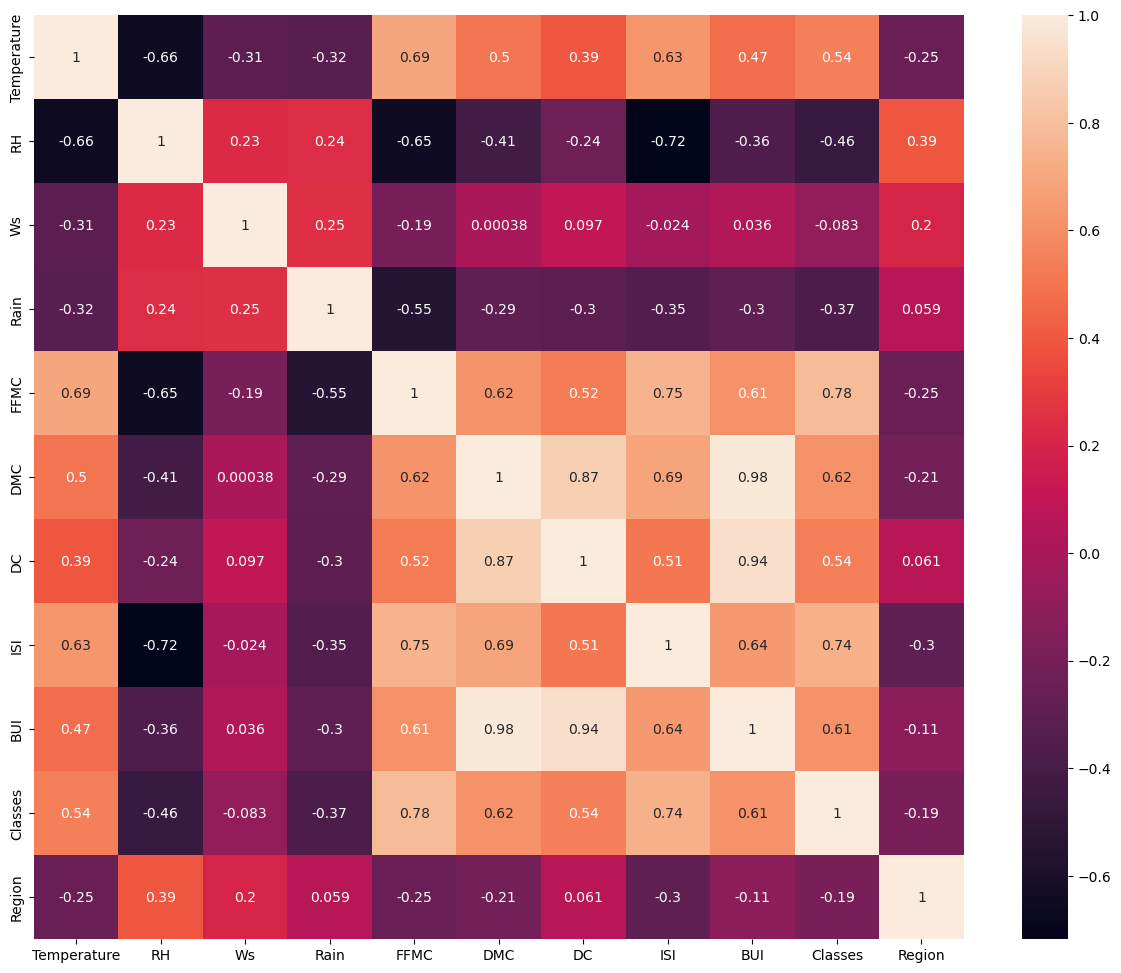

In [95]:
## check for multicolinearity 
plt.figure(figsize=(15,12))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [96]:
def correlation(dataset,threshold): 
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): 
        for j in range(i): 
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [97]:
corr_features = correlation(X_train,0.85)

In [98]:
# drop features when correlation is more then the threshold 
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Feature Scaling Or Standarization

In [99]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 1.0, 'X Train After Scaling')

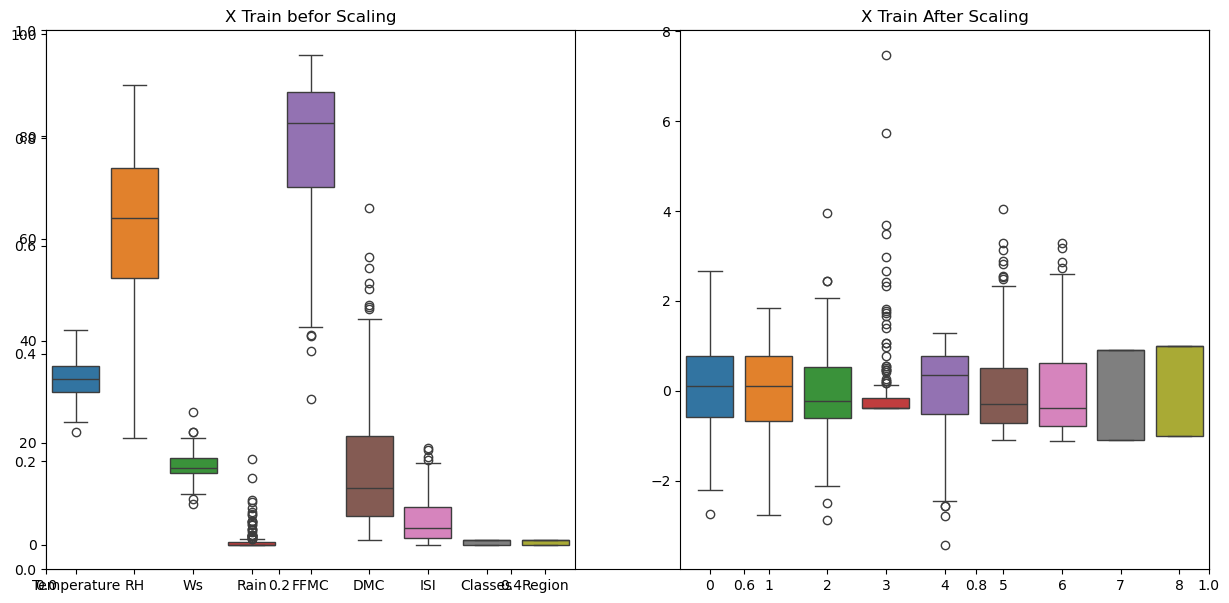

In [100]:
plt.subplots(figsize=(15,7)) 
plt.subplot(121)
sns.boxplot(data=X_train)
plt.title('X Train befor Scaling')
plt.subplot(122)
sns.boxplot(data=X_train_scaled)
plt.title('X Train After Scaling')


# Linear Regression Model

In [104]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Prediction and Accuracy


Score : 0.9847657384266951
Addjusted R2 score : 0.9820773393255237
mean_absolute_error : 0.5468236465249995
mean_squared_error : 0.6742766873791607
root_mean_squared_error 0.8211435242265268


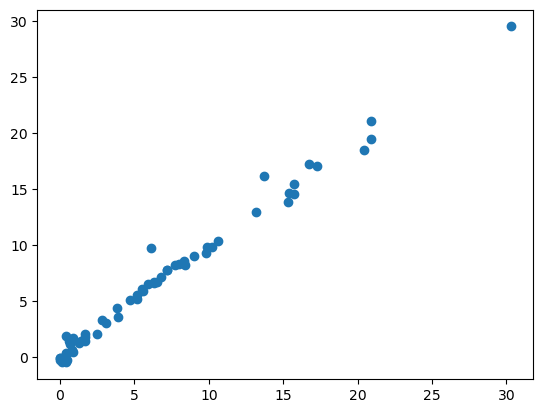

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

# Lasso Regression Model

In [109]:
## Lasso Regression 
from sklearn.linear_model import Lasso 
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Score : 0.9492020263112388
Addjusted R2 score : 0.9402376780132222
mean_absolute_error : 1.1331759949144087
mean_squared_error : 2.248345891897476
root_mean_squared_error 1.499448529259166


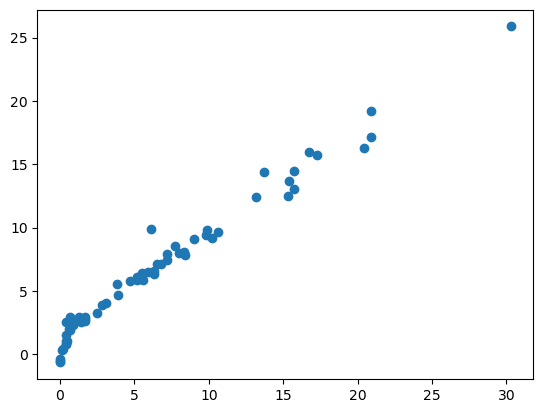

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lasso_model.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

In [115]:
from sklearn.linear_model import LassoCV 
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


Score : 0.9820946715928275
Addjusted R2 score : 0.9789349077562677
mean_absolute_error : 0.6199701158263433
mean_squared_error : 0.7924995554743635
root_mean_squared_error 0.8902244410677362


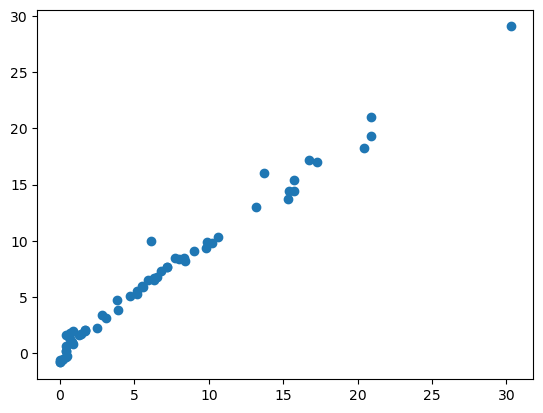

In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lassocv.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

In [118]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [119]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

# Ridge Regression Model

In [ ]:
## Ridge Regression 
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Score : 0.9842993364555515
Addjusted R2 score : 0.9815286311241782
mean_absolute_error : 0.5642305340105677
mean_squared_error : 0.694919891815204
root_mean_squared_error 0.8336185529456527


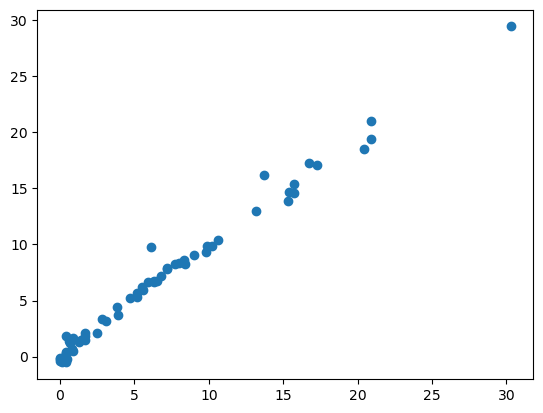

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = ridge_model.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

In [121]:
from sklearn.linear_model import RidgeCV 
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


Score : 0.9842993364555515
Addjusted R2 score : 0.9815286311241782
mean_absolute_error : 0.5642305340105677
mean_squared_error : 0.694919891815204
root_mean_squared_error 0.8336185529456527


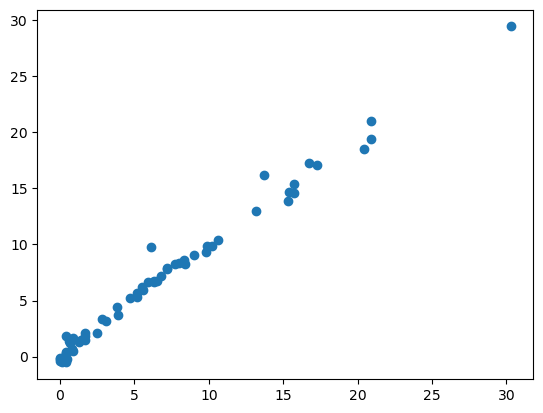

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = ridgecv.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

In [124]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

# Elastic Net Regression Model

In [113]:
# Elastic Net Regression 
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Score : 0.8753460589519703
Addjusted R2 score : 0.8533483046493768
mean_absolute_error : 1.8822353634896005
mean_squared_error : 5.517251101025226
root_mean_squared_error 2.348882947493388


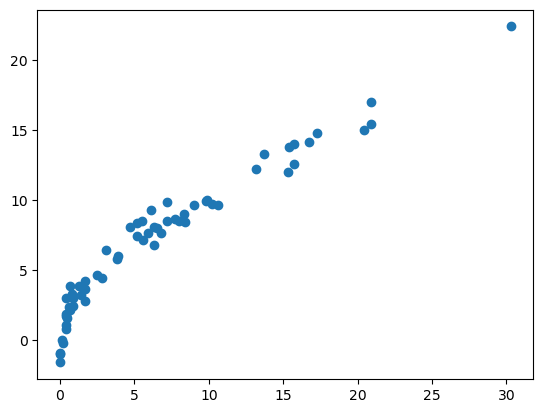

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = elasticnet_model.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)

In [125]:
from sklearn.linear_model import ElasticNetCV 
elasticnetcv = ElasticNetCV() 
elasticnetcv.fit(X_train_scaled,y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


Score : 0.9814217587854942
Addjusted R2 score : 0.9781432456299932
mean_absolute_error : 0.6575946731430896
mean_squared_error : 0.8222830416276251
root_mean_squared_error 0.9067982364493355


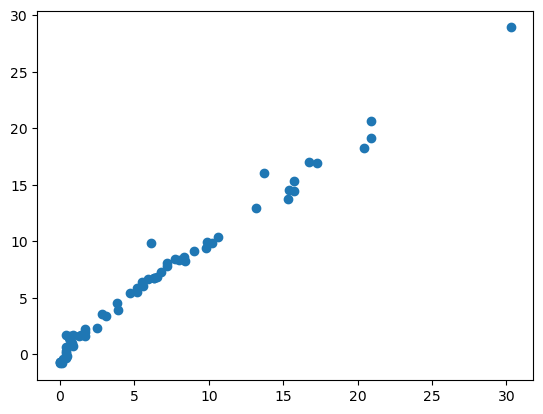

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = elasticnetcv.predict(X_test_scaled) 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
addjusted_r2 = 1 - (1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)
print('Score :', score)
print('Addjusted R2 score :', addjusted_r2)
print('mean_absolute_error :', mae)
print('mean_squared_error :', mse)
print('root_mean_squared_error', rmse)
plt.scatter(y_test,y_pred)